In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import tools
import numpy as np
from datetime  import datetime
from datetime import timedelta
from glob import glob

scrip.so not found. Remapping function will not be available


### Select Date

In [2]:
date = datetime(2014,9,20)
strdate = date.strftime('%Y%m%d')
strdate_after = (date + timedelta(days=1)).strftime('%Y%m%d')

### Bounding Box

In [3]:
limits=[0, 1.5, 38.2, 39.2]

### Define Paths

In [4]:
file_analysis = '/DATA/jhernandez/WMOP_ASSIM/Outputs/HFR_all_future_nudging_Oct2014_OSSE/{0}/ensmean_std/roms_{0}_ensmean_analysis_SLA_SST_ARGO_HFR_future_ungridded_tsuvh_80mbs_loc200km_EnOI_WMOP.nc'.format(strdate)
file_background = '/DATA/jhernandez/WMOP_ASSIM/Outputs/HFR_all_future_nudging_Oct2014_OSSE/{0}/ensmean_std/roms_{0}_ensmean_forecast_SLA_SST_ARGO_HFR_future_ungridded_tsuvh_80mbs_loc200km_EnOI_WMOP.nc'.format(strdate)
file_wmop = '/DATA/jhernandez/ROMS/Outputs/HFR_all_future_nudging_Oct2014_OSSE/roms_WMOP_ASSIM_{0}_his.nc'.format(strdate_after)
file_ndg = '/DATA/jhernandez/ROMS/Outputs/HFR_all_future_nudging_Oct2014_OSSE/roms_WMOP_ASSIM_nudging_{0}_his.nc'.format(strdate)
file_nr = '/home/modelling/data/WMOP/WMOP_FORECAST/Outputs/FORECAST_CMEMS_RESTARTS/forecast_scratch/roms_WMOP_FORECAST_{0}_his.nc'.format(strdate)

### Load DataSets

In [5]:
ds_an = xr.open_dataset(file_analysis)
ds_bg = xr.open_dataset(file_background)
ds_wmop = xr.open_dataset(file_wmop)
ds_nr = xr.open_dataset(file_nr)
ds_ndg = xr.open_dataset(file_ndg)

In [6]:
ds_an_salt = ds_an['salt'].where( (ds_an.lon_rho>limits[0]) & (ds_an.lon_rho<limits[1]) & (ds_an.lat_rho>limits[2]) & (ds_an.lat_rho<limits[3]), drop=True )
ds_an_temp = ds_an['temp'].where( (ds_an.lon_rho>limits[0]) & (ds_an.lon_rho<limits[1]) & (ds_an.lat_rho>limits[2]) & (ds_an.lat_rho<limits[3]), drop=True )


## Prepare for plotting velocities

In [7]:
sset = 2

x = ds_wmop.lon_rho.values[::sset,::sset]
y = ds_wmop.lat_rho.values[::sset,::sset]

#x = ds_wmop.lon_rho.where( (ds_wmop.lon_rho>limits[0]) & (ds_wmop.lon_rho<limits[1]) & (ds_wmop.lat_rho>limits[2]) & (ds_wmop.lat_rho<limits[3]), drop=True )[::sset,::sset].values
#y = ds_wmop.lat_rho.where( (ds_wmop.lon_rho>limits[0]) & (ds_wmop.lon_rho<limits[1]) & (ds_wmop.lat_rho>limits[2]) & (ds_wmop.lat_rho<limits[3]), drop=True )[::sset,::sset].values


In [8]:
u_an = tools.u2rho_2d( ds_an['u'][0,-1,:,:].values)[::sset,::sset]
v_an = tools.v2rho_2d( ds_an['v'][0,-1,:,:].values)[::sset,::sset]

u_wmop = tools.u2rho_2d( ds_wmop['u'][0,-1,:,:].values)[::sset,::sset]
v_wmop = tools.v2rho_2d( ds_wmop['v'][0,-1,:,:].values)[::sset,::sset]

u_bg = tools.u2rho_2d( ds_bg['u'][0,-1,:,:].values)[::sset,::sset]
v_bg = tools.v2rho_2d( ds_bg['v'][0,-1,:,:].values)[::sset,::sset]

u_nr = tools.u2rho_2d( np.mean(ds_nr['u'][:,-1,:,:].values, axis=0))[::sset,::sset]
v_nr = tools.v2rho_2d( np.mean(ds_nr['v'][:,-1,:,:].values, axis=0))[::sset,::sset]

## Plot Temp Fields from WMOP and Analysis files

In [ ]:
%matplotlib inline

/DATA/jhernandez/Softs/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/DATA/jhernandez/Softs/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)


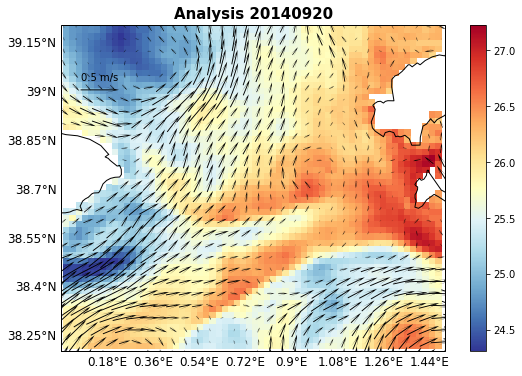

In [14]:
fig = plt.figure(figsize=(9,6))

ax, gl = tools.make_map(continents=False, limits=[0, 1.5, 38.2, 39.2], subplot_dim=111)
plt.pcolormesh(ds_an_temp.lon_rho, ds_an_temp.lat_rho, ds_an_temp[0,-1,:,:], transform=gl.crs, cmap='RdYlBu_r')#, vmin=22.5, vmax=25.5)
cb = plt.colorbar()
q = ax.quiver(x,y,u_an, v_an, transform=gl.crs, scale=5, animated=True, headlength=15, headwidth=6, pivot='middle')
ax.quiverkey(q, 0.1, 0.8,0.5,'0.5 m/s')
plt.title('Analysis {0}'.format(strdate), fontsize=15, fontweight='bold')

fig.savefig('/home/jhernandez/Escritorio/kk.png', dpi=250)

/DATA/jhernandez/Softs/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/DATA/jhernandez/Softs/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)


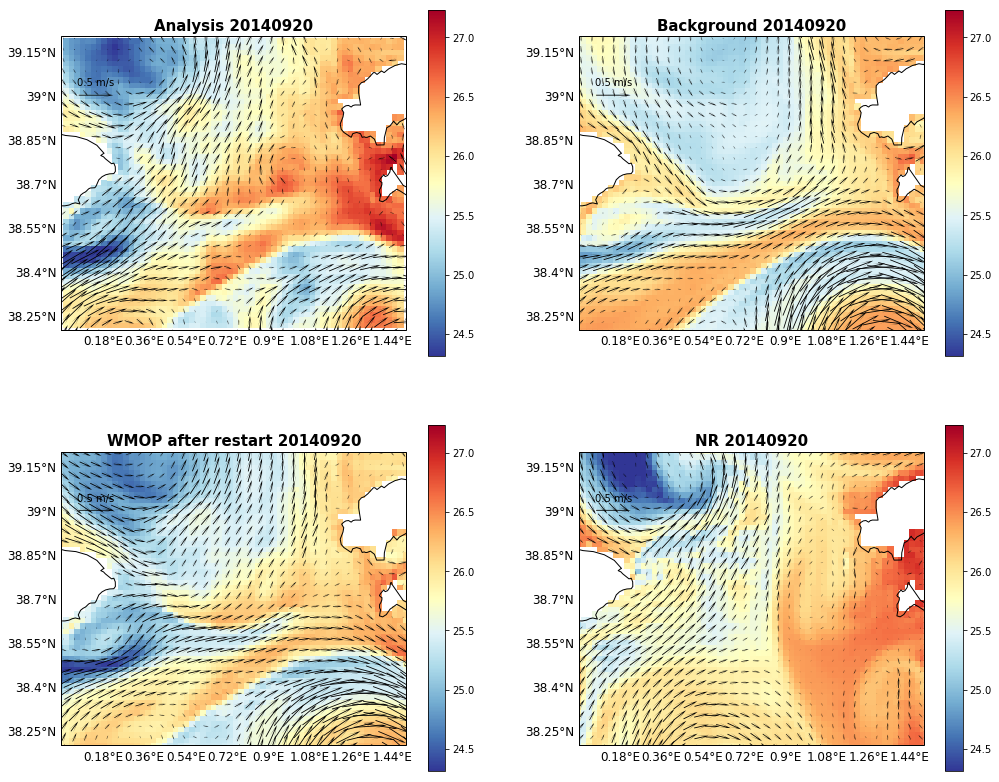

In [9]:
fig = plt.figure(figsize=(17,14))

ax, gl = tools.make_map(continents=False, limits=[0, 1.5, 38.2, 39.2], subplot_dim=221)
plt.pcolormesh(ds_an_temp.lon_rho, ds_an_temp.lat_rho, ds_an_temp[0,-1,:,:], transform=gl.crs, cmap='RdYlBu_r')#, vmin=22.5, vmax=25.5)
cb = plt.colorbar()
q = ax.quiver(x,y,u_an, v_an, transform=gl.crs, scale=5, animated=True, headlength=15, headwidth=6, pivot='middle')
ax.quiverkey(q, 0.1, 0.8,0.5,'0.5 m/s')
plt.title('Analysis {0}'.format(strdate), fontsize=15, fontweight='bold')

clims = cb.get_clim()

ax, gl = tools.make_map(continents=False, limits=[0, 1.5, 38.2, 39.2], subplot_dim=222)
plt.pcolormesh(ds_an.lon_rho, ds_an.lat_rho, ds_bg.temp[0,-1,:,:], transform=gl.crs, cmap='RdYlBu_r', vmin=clims[0], vmax=clims[1])
plt.colorbar()
q = ax.quiver(x,y,u_bg, v_bg, transform=gl.crs, scale=5, animated=True, headlength=15, headwidth=6, pivot='middle')
ax.quiverkey(q, 0.1, 0.8,0.5,'0.5 m/s')
plt.title('Background {0}'.format(strdate), fontsize=15, fontweight='bold')

ax, gl = tools.make_map(continents=False, limits=[0, 1.5, 38.2, 39.2], subplot_dim=223)
plt.pcolormesh(ds_an.lon_rho, ds_an.lat_rho, ds_wmop.temp[0,-1,:,:], transform=gl.crs, cmap='RdYlBu_r', vmin=clims[0], vmax=clims[1])
plt.colorbar()
q = ax.quiver(x,y,u_wmop, v_wmop, transform=gl.crs, scale=5, animated=True, headlength=15, headwidth=6, pivot='middle')
ax.quiverkey(q, 0.1, 0.8,0.5,'0.5 m/s')
plt.title('WMOP after restart {0}'.format(strdate), fontsize=15, fontweight='bold')

ax, gl = tools.make_map(continents=False, limits=[0, 1.5, 38.2, 39.2], subplot_dim=224)
plt.pcolormesh(ds_an.lon_rho, ds_an.lat_rho, ds_nr.temp[3,-1,:,:], transform=gl.crs, cmap='RdYlBu_r', vmin=clims[0], vmax=clims[1])
plt.colorbar()
q = ax.quiver(x,y,u_nr, v_nr, transform=gl.crs, scale=5, animated=True, headlength=15, headwidth=6, pivot='middle')
ax.quiverkey(q, 0.1, 0.8,0.5,'0.5 m/s')
plt.title('NR {0}'.format(strdate), fontsize=15, fontweight='bold')

plt.show()

In [ ]:
#fig.savefig('/home/jhernandez/Escritorio/surface_temperature_fields_comparisons_OSSE_{0}'.format(strdate), dpi=250)

## Plot Salinity Fields from WMOP and Analysis files

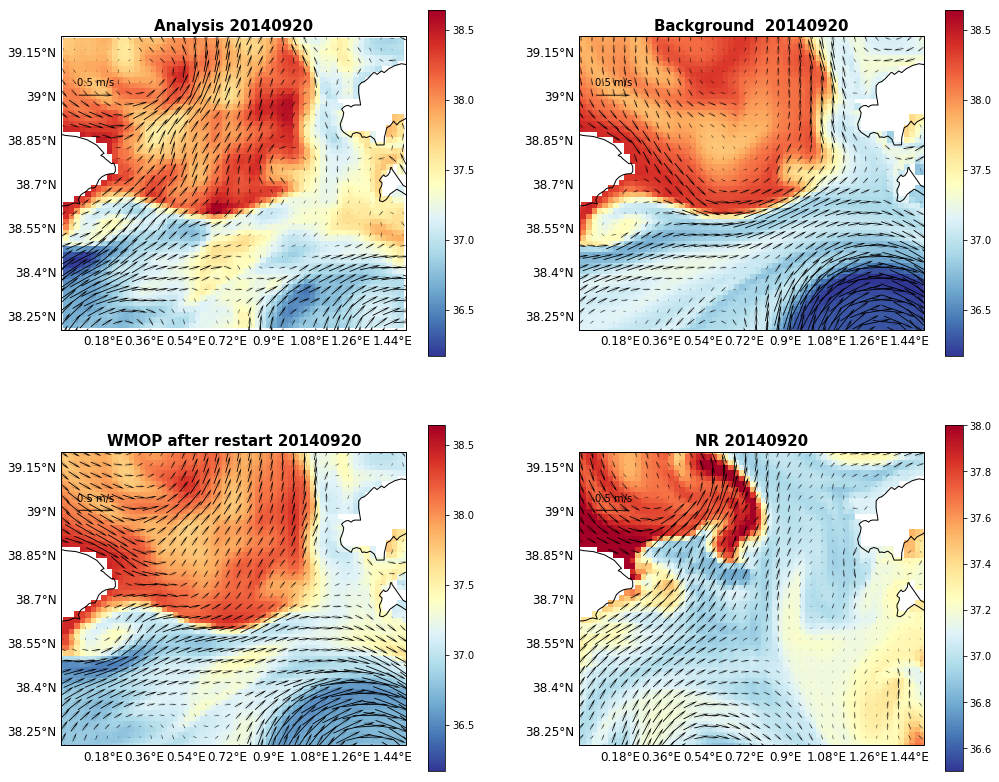

In [15]:
fig2 = plt.figure(figsize=(17,14))

ax, gl = tools.make_map(continents=False, limits=[0, 1.5, 38.2, 39.2], subplot_dim=221)
plt.pcolormesh(ds_an_salt.lon_rho, ds_an_salt.lat_rho, ds_an_salt[0,-1,:,:], transform=gl.crs, cmap='RdYlBu_r')#, vmin=36.5, vmax=38)
cb = plt.colorbar()
q = ax.quiver(x,y,u_an, v_an, transform=gl.crs, scale=5, animated=True, headlength=15, headwidth=6, pivot='middle')
ax.quiverkey(q, 0.1, 0.8,0.5,'0.5 m/s')
plt.title('Analysis {0}'.format(strdate), fontsize=15, fontweight='bold')

clims = cb.get_clim()

ax, gl = tools.make_map(continents=False, limits=[0, 1.5, 38.2, 39.2], subplot_dim=222)
plt.pcolormesh(ds_an.lon_rho, ds_an.lat_rho, ds_bg.salt[0,-1,:,:], transform=gl.crs, cmap='RdYlBu_r', vmin=clims[0], vmax=clims[1])
plt.colorbar()
q = ax.quiver(x,y,u_bg, v_bg, transform=gl.crs, scale=5, animated=True, headlength=15, headwidth=6, pivot='middle')
ax.quiverkey(q, 0.1, 0.8,0.5,'0.5 m/s')
plt.title('Background  {0}'.format(strdate), fontsize=15, fontweight='bold')

ax, gl = tools.make_map(continents=False, limits=[0, 1.5, 38.2, 39.2], subplot_dim=223)
plt.pcolormesh(ds_an.lon_rho, ds_an.lat_rho, ds_wmop.salt[0,-1,:,:], transform=gl.crs, cmap='RdYlBu_r', vmin=clims[0], vmax=clims[1])
plt.colorbar()
q = ax.quiver(x,y,u_wmop, v_wmop, transform=gl.crs, scale=5, animated=True, headlength=15, headwidth=6, pivot='middle')
ax.quiverkey(q, 0.1, 0.8,0.5,'0.5 m/s')
plt.title('WMOP after restart {0}'.format(strdate), fontsize=15, fontweight='bold')

ax, gl = tools.make_map(continents=False, limits=[0, 1.5, 38.2, 39.2], subplot_dim=224)
plt.pcolormesh(ds_an.lon_rho, ds_an.lat_rho, ds_nr.salt[0,-1,:,:], transform=gl.crs, cmap='RdYlBu_r', vmin=36.5, vmax=38)
plt.colorbar()
q = ax.quiver(x,y,u_nr, v_nr, transform=gl.crs, scale=5, animated=True, headlength=15, headwidth=6, pivot='middle')
ax.quiverkey(q, 0.1, 0.8,0.5,'0.5 m/s')
plt.title('NR {0}'.format(strdate), fontsize=15, fontweight='bold')

plt.show()

In [ ]:
fig2.savefig('/home/jhernandez/Escritorio/surface_salinity_fields_comparisons_OSSE_{0}'.format(strdate), dpi=250)